In [3]:
#  Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986
# loading the reuters dataset


from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 32s 15us/step


In [4]:
len(train_data), len(test_data)

(8982, 2246)

In [6]:
# decoding newswire back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [12]:
# preparing the data
import numpy as np
def vectorized_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)

In [13]:
# vectorization by one-hot encoding
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
# there is a built in way to do it in keras, which is
from keras.utils.np_utils import to_categorical
one_hot_train_labels_ke = to_categorical(train_labels)
one_hot_test_labels_ke = to_categorical(test_labels)

In [18]:
one_hot_test_labels.shape

(2246, 46)

In [20]:
# building your network

# 16 dimensional space may be too limited to separate 46 different classes; such
# small layers may act as information bottlenecks, permanently dropping relevant
# information. for this reason let's use 64 units

# model defination
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))



In [21]:
# The best loss function to use in this case is categorical_crossentropy. It measures
# the distance between two probability distrbutions.

# compiling the model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
# validating your approach
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [26]:
# training the network for 20 epochs
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 12s 2ms/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 3s 428us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 4s 438us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 3s 397us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 3s 402us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 4s 489us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 4s 448us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030
E

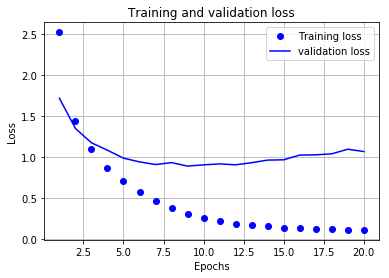

In [32]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

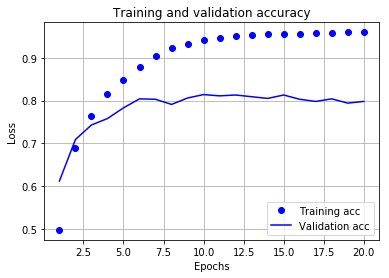

In [34]:
# plotting the training and validation accuracy
plt.clf() # clears figure
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [35]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 346, validation_data = [x_val, y_val])
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 502us/step - loss: 2.2893 - acc: 0.5598 - val_loss: 1.5325 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 3s 409us/step - loss: 1.2221 - acc: 0.7325 - val_loss: 1.1819 - val_acc: 0.7350
Epoch 3/9
7982/7982 [==============================] - 4s 493us/step - loss: 0.9037 - acc: 0.7982 - val_loss: 1.0443 - val_acc: 0.7730
Epoch 4/9
7982/7982 [==============================] - 4s 486us/step - loss: 0.6890 - acc: 0.8522 - val_loss: 1.0953 - val_acc: 0.7430
Epoch 5/9
7982/7982 [==============================] - 4s 483us/step - loss: 0.5360 - acc: 0.8847 - val_loss: 0.9471 - val_acc: 0.8210
Epoch 6/9
7982/7982 [==============================] - 4s 475us/step - loss: 0.4169 - acc: 0.9127 - val_loss: 0.8999 - val_acc: 0.8210
Epoch 7/9
7982/7982 [==============================] - 5s 610us/step - loss: 0.3273 - acc: 0.9293 - val_loss: 0.9057 - val_acc: 0.8330
Epoch 8

[1.2992881730742891, 0.71593944796046716]

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = [x_val, y_val])
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 469us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 3s 375us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 3s 385us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 4s 455us/step - loss: 0.8180 - acc: 0.8324 - val_loss: 1.0271 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 4s 451us/step - loss: 0.6507 - acc: 0.8628 - val_loss: 0.9517 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 4s 455us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9205 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 4s 457us/step - loss: 0.4211 - acc: 0.9110 - val_loss: 0.9006 - val_acc: 0.8150
Epoch 8

[0.98449164209680051, 0.78628673202101929]

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 500, validation_data = [x_val, y_val])
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 494us/step - loss: 2.4630 - acc: 0.5309 - val_loss: 1.6389 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 4s 450us/step - loss: 1.3466 - acc: 0.7200 - val_loss: 1.2642 - val_acc: 0.7180
Epoch 3/9
7982/7982 [==============================] - 4s 443us/step - loss: 1.0076 - acc: 0.7881 - val_loss: 1.1167 - val_acc: 0.7570
Epoch 4/9
7982/7982 [==============================] - 3s 438us/step - loss: 0.7969 - acc: 0.8327 - val_loss: 1.0108 - val_acc: 0.7930
Epoch 5/9
7982/7982 [==============================] - 3s 438us/step - loss: 0.6289 - acc: 0.8671 - val_loss: 0.9566 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 4s 495us/step - loss: 0.5033 - acc: 0.8930 - val_loss: 0.9291 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 4s 449us/step - loss: 0.4008 - acc: 0.9139 - val_loss: 0.9079 - val_acc: 0.8090
Epoch 8

[0.97942513667995768, 0.78539626004434759]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/ len(test_labels)

0.1767586821015138

In [39]:
# generating predictions on new data
predictions =model.predict(x_test)
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

0.99999982

In [41]:
# the largest entry is the predicted class
np.argmax(predictions[0])

3

In [42]:
# Another way to encode labels is to cast them as an integer tensor, like this
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
# the ony thing this approach would change is the choice of the loss function.
# The loss function used intially (categorical_crossentropy) expects the labels to follow
# a categorical encoding. With integer labels, we should use sparse_categorical_crossentropy
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [44]:
# the new loss function is still mathematically the same as categorical_crossentropy

# the importance of having sufficiently large intermediate layers
# now let's see what happens when you introduce an information bottleneck by having
# intermediate layers that are significantly less than 46-dimensional: for exampel, 33-dimensional.

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(33, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 346, validation_data = [x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 5s 636us/step - loss: 2.6235 - acc: 0.5059 - val_loss: 1.7752 - val_acc: 0.6400
Epoch 2/9
7982/7982 [==============================] - 4s 491us/step - loss: 1.4096 - acc: 0.7111 - val_loss: 1.2743 - val_acc: 0.7280
Epoch 3/9
7982/7982 [==============================] - 3s 426us/step - loss: 1.0268 - acc: 0.7863 - val_loss: 1.1040 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 4s 478us/step - loss: 0.8006 - acc: 0.8311 - val_loss: 1.0084 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 4s 503us/step - loss: 0.6297 - acc: 0.8680 - val_loss: 0.9542 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 4s 473us/step - loss: 0.5011 - acc: 0.8950 - val_loss: 0.9090 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 4s 480us/step - loss: 0.3956 - acc: 0.9203 - val_loss: 0.8917 - val_acc: 0.8170
Epoch 8

In [45]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 1s 423us/step


[1.0375779859741565, 0.78183437221727514]